## JWST F1130W NGC628 ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 28 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F1130W"
fwhm = 3.3
basename = "jw021070"

# rotation = 0.0
crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
tile1_shifts = [0.0, 0.0]
tile2_shifts = [0.0, 0.0]
tile3_shifts = [0.0, 0.0]
tile4_shifts = [0.0, 0.0]
tile5_shifts = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
#tile1_shifts = [-0.05647150365601337, -0.2759964433337788]
#tile2_shifts = [0.25227164704614663, -0.31523502700888206]
#tile3_shifts = [-0.2545612377015838, -0.3166996893456614]
#tile4_shifts = [-0.257545863147537, -0.31632086761441347]
#tile5_shifts = [-0.2575264791579155, -0.3163360127396757]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [30, 60.]
# display range for calibrated images
drange_cal = [42., 60.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.3.dev1+g3e8a10cb.d20220719


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev1+g51f5dfc


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1130W/stage0/jw02107039001_02105_00001_mirimage_uncal.fits', './F1130W/stage0/jw02107039001_02105_00002_mirimage_uncal.fits', './F1130W/stage0/jw02107039001_02105_00003_mirimage_uncal.fits', './F1130W/stage0/jw02107039001_02105_00004_mirimage_uncal.fits', './F1130W/stage0/jw02107039002_02105_00001_mirimage_uncal.fits', './F1130W/stage0/jw02107039002_02105_00002_mirimage_uncal.fits', './F1130W/stage0/jw02107039002_02105_00003_mirimage_uncal.fits', './F1130W/stage0/jw02107039002_02105_00004_mirimage_uncal.fits', './F1130W/stage0/jw02107039003_02105_00001_mirimage_uncal.fits', './F1130W/stage0/jw02107039003_02105_00002_mirimage_uncal.fits', './F1130W/stage0/jw02107039003_02105_00003_mirimage_uncal.fits', './F1130W/stage0/jw02107039003_02105_00004_mirimage_uncal.fits', './F1130W/stage0/jw02107040001_06201_00001_mirimage_uncal.fits', './F1130W/stage0/jw02107040001_06201_00002_mirimage_uncal.fits', './F1130W/stage0/jw02107040001_06201_00003_mirimage_uncal.fits', './F1130W/stage0/jw02107

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-28 10:30:09,098 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-28 10:30:09,102 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-28 10:30:09,103 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-28 10:30:09,107 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-28 10:30:09,108 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-28 10:30:09,112 - stpipe 

./F1130W/stage0/jw02107039001_02105_00001_mirimage_uncal.fits


2022-07-28 10:30:09,285 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-28 10:30:16,256 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:30:16,257 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:30:16,265 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:30:16,408 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039001_02105_00001_mirimage_uncal.fits>,).
2022-07-28 10:30:16,411 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:30:16,459 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-28 10:30:40,089 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:30:40,090 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:30:40,090 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:30:40,091 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:30:40,092 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-28 10:30:40,093 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-28 10:30:40,094 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-28 10:30:40,094 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-28 10:30:40,095 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-28 10:30:40,521 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-28 10:31:21,792 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:31:21,796 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:31:22,083 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:31:22,219 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039001_02105_00001_mirimage_uncal.fits>,).
2022-07-28 10:31:22,223 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:31:22,314 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-28 10:31:22,315 - stpipe.De

2022-07-28 10:31:22,983 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-28 10:31:22,986 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'after_jump_flag_dn1': 0.0, 'after_jump_flag_time1': 0.0, 'after_jump_flag_dn2': 0.0, 'after_jump_flag_time2': 0.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-28 10:31:22,987 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-28 10:31:22,989 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_ho

./F1130W/stage0/jw02107039001_02105_00002_mirimage_uncal.fits


2022-07-28 10:31:23,118 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107039001_02105_00002_mirimage_uncal.fits',).
2022-07-28 10:31:23,149 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:31:24,312 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:31:24,471 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:31:24,472 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:31:24,477 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:31:24,594 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039001_02105_00002_mirimage_uncal.fits>,).
2022-07-28 10:31:24,597 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:31:35,211 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:31:35,347 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:31:35,348 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:31:35,349 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:31:35,349 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:31:35,350 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:32:15,357 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:32:17,149 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:32:17,152 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:32:17,361 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:32:17,365 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:32:19,257 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:32:19,261 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:32:19,658 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:32:19,831 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039001_02105_00002_mirimage_uncal.fits>,).
2022-07-28 10:32:19,835 - stp

2022-07-28 10:32:20,594 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:32:20,595 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:32:20,597 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:32:20,598 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107039001_02105_00003_mirimage_uncal.fits


2022-07-28 10:32:21,424 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02107039001_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-28 10:32:21,449 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-28 10:32:21,451 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-28 10:32:21,452 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-28 10:32:21,453 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-28 10:32:28,133 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:32:28,188 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-28 10:32:29,119 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-28 10:32:29,242 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(1, 28, 1024, 1032) from jw02107039001_02105_00003_mirimage_uncal.fits>,).
2022-07-28 10:32:29,246 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-28 10:32:37,684 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-28 10:32:37,947 - stpipe.Detector1Pipeline.jump - WARNING - /home/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:152: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-28 10:32:37,974 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7180 pixels with at least one CR from five or more groups.
2022-07-28 10:32:37,976 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 22 pixels with at least one CR from four groups.
2022-07-28 10:32:37,979 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-28 10:32:45,466 - stpipe.Detector1Pipeline.jump - INFO - Total elapsed time = 10.2445 sec
2022-07-28 10:32:45,475 - stpipe.Detector1Pipeline.jump - INFO -

2022-07-28 10:33:17,901 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True, 'override_refpix': None, 'class': ''}


2022-07-28 10:33:17,902 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-07-28 10:33:17,907 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'type': 'baseline', 'override_rscd': None, 'class': ''}


2022-07-28 10:33:17,908 - stpipe.Detector1Pipeline.rscd - INFO - 

./F1130W/stage0/jw02107039001_02105_00004_mirimage_uncal.fits


2022-07-28 10:33:18,145 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-28 10:33:19,544 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:33:19,546 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:33:19,552 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:33:19,702 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039001_02105_00004_mirimage_uncal.fits>,).
2022-07-28 10:33:19,705 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:33:19,785 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-28 10:33:32,015 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:33:32,016 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:33:32,017 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:33:32,018 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:33:32,019 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-28 10:33:32,019 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-28 10:33:32,020 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-28 10:33:32,021 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-28 10:33:32,022 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-28 10:33:32,577 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-28 10:34:12,102 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:34:12,106 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:34:12,397 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:34:12,544 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039001_02105_00004_mirimage_uncal.fits>,).
2022-07-28 10:34:12,547 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:34:12,632 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-28 10:34:12,633 - stpipe.De

2022-07-28 10:34:13,311 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-28 10:34:13,314 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'after_jump_flag_dn1': 0.0, 'after_jump_flag_time1': 0.0, 'after_jump_flag_dn2': 0.0, 'after_jump_flag_time2': 0.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-28 10:34:13,315 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-28 10:34:13,317 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_ho

./F1130W/stage0/jw02107039002_02105_00001_mirimage_uncal.fits


2022-07-28 10:34:13,470 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-28 10:34:14,822 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:34:14,823 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:34:14,830 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:34:14,957 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039002_02105_00001_mirimage_uncal.fits>,).
2022-07-28 10:34:14,959 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:34:15,034 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-28 10:34:26,137 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:34:26,138 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:34:26,139 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:34:26,139 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:34:26,140 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-28 10:34:26,141 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-28 10:34:26,142 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-28 10:34:26,143 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-28 10:34:26,144 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-28 10:34:26,602 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-28 10:34:58,295 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:34:58,299 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:34:58,547 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:34:58,711 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039002_02105_00001_mirimage_uncal.fits>,).
2022-07-28 10:34:58,714 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:34:58,804 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-28 10:34:58,805 - stpipe.De

2022-07-28 10:34:59,473 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-28 10:34:59,477 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'after_jump_flag_dn1': 0.0, 'after_jump_flag_time1': 0.0, 'after_jump_flag_dn2': 0.0, 'after_jump_flag_time2': 0.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-28 10:34:59,479 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-28 10:34:59,482 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_ho

./F1130W/stage0/jw02107039002_02105_00002_mirimage_uncal.fits


2022-07-28 10:34:59,630 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107039002_02105_00002_mirimage_uncal.fits',).
2022-07-28 10:34:59,656 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:35:00,826 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:35:00,995 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:35:00,996 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:35:01,001 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:35:01,149 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039002_02105_00002_mirimage_uncal.fits>,).
2022-07-28 10:35:01,152 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:35:11,990 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:35:12,147 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:35:12,148 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:35:12,148 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:35:12,149 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:35:12,150 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:35:41,124 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:35:42,162 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:35:42,166 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:35:42,817 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:35:42,821 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:35:44,976 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:35:44,980 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:35:45,248 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:35:45,416 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039002_02105_00002_mirimage_uncal.fits>,).
2022-07-28 10:35:45,420 - stp

2022-07-28 10:35:46,171 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:35:46,173 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:35:46,175 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:35:46,175 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107039002_02105_00003_mirimage_uncal.fits


2022-07-28 10:35:46,330 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107039002_02105_00003_mirimage_uncal.fits',).
2022-07-28 10:35:46,358 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:35:47,557 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:35:47,732 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:35:47,733 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:35:47,741 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:35:47,893 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039002_02105_00003_mirimage_uncal.fits>,).
2022-07-28 10:35:47,897 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:35:58,879 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:35:59,032 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:35:59,033 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:35:59,034 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:35:59,035 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:35:59,035 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:36:27,878 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:36:29,132 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:36:29,136 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:36:29,508 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:36:29,512 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:36:30,878 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:36:30,882 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:36:31,149 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:36:31,325 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039002_02105_00003_mirimage_uncal.fits>,).
2022-07-28 10:36:31,328 - stp

2022-07-28 10:36:32,102 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:36:32,103 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:36:32,105 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:36:32,105 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107039002_02105_00004_mirimage_uncal.fits


2022-07-28 10:36:32,260 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107039002_02105_00004_mirimage_uncal.fits',).
2022-07-28 10:36:32,289 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:36:33,488 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:36:33,673 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:36:33,674 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:36:33,680 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:36:33,837 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039002_02105_00004_mirimage_uncal.fits>,).
2022-07-28 10:36:33,840 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:36:44,778 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:36:44,952 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:36:44,953 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:36:44,953 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:36:44,954 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:36:44,955 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:37:14,372 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:37:15,270 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:37:15,274 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:37:15,288 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:37:15,292 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:37:17,526 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:37:17,530 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:37:17,790 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:37:17,960 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039002_02105_00004_mirimage_uncal.fits>,).
2022-07-28 10:37:17,964 - stp

2022-07-28 10:37:18,746 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:37:18,747 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:37:18,749 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:37:18,750 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107039003_02105_00001_mirimage_uncal.fits


2022-07-28 10:37:18,940 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-28 10:37:20,294 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:37:20,295 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:37:20,301 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:37:20,458 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039003_02105_00001_mirimage_uncal.fits>,).
2022-07-28 10:37:20,462 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:37:20,519 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-28 10:37:31,663 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:37:31,664 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:37:31,665 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:37:31,665 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:37:31,666 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-28 10:37:31,666 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-28 10:37:31,667 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-28 10:37:31,667 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-28 10:37:31,669 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-28 10:37:32,124 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-28 10:38:03,877 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:38:03,881 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:38:04,143 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:38:04,319 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039003_02105_00001_mirimage_uncal.fits>,).
2022-07-28 10:38:04,322 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:38:04,420 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-28 10:38:04,421 - stpipe.De

2022-07-28 10:38:05,116 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-28 10:38:05,118 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'after_jump_flag_dn1': 0.0, 'after_jump_flag_time1': 0.0, 'after_jump_flag_dn2': 0.0, 'after_jump_flag_time2': 0.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-28 10:38:05,119 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-28 10:38:05,122 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_ho

./F1130W/stage0/jw02107039003_02105_00002_mirimage_uncal.fits


2022-07-28 10:38:05,282 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107039003_02105_00002_mirimage_uncal.fits',).
2022-07-28 10:38:05,310 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:38:06,556 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:38:06,730 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:38:06,731 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:38:06,737 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:38:06,893 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039003_02105_00002_mirimage_uncal.fits>,).
2022-07-28 10:38:06,896 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:38:18,008 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:38:18,181 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:38:18,182 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:38:18,183 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:38:18,183 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:38:18,184 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:38:46,924 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:38:48,397 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:38:48,400 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:38:49,300 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:38:49,304 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:38:50,782 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:38:50,785 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:38:51,038 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:38:51,213 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039003_02105_00002_mirimage_uncal.fits>,).
2022-07-28 10:38:51,217 - stp

2022-07-28 10:38:51,990 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:38:51,990 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:38:51,994 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:38:51,995 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107039003_02105_00003_mirimage_uncal.fits


2022-07-28 10:38:52,163 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107039003_02105_00003_mirimage_uncal.fits',).
2022-07-28 10:38:52,190 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:38:53,398 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:38:53,568 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:38:53,569 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:38:53,575 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:38:53,732 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039003_02105_00003_mirimage_uncal.fits>,).
2022-07-28 10:38:53,735 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:39:04,740 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:39:04,912 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:39:04,913 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:39:04,913 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:39:04,914 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:39:04,914 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:39:34,241 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:39:34,584 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:39:34,588 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:39:35,294 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:39:35,298 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:39:37,466 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:39:37,470 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:39:37,741 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:39:37,919 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039003_02105_00003_mirimage_uncal.fits>,).
2022-07-28 10:39:37,922 - stp

2022-07-28 10:39:38,688 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:39:38,689 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:39:38,691 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:39:38,692 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107039003_02105_00004_mirimage_uncal.fits


2022-07-28 10:39:38,859 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107039003_02105_00004_mirimage_uncal.fits',).
2022-07-28 10:39:38,885 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:39:40,122 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:39:40,295 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:39:40,295 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:39:40,301 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:39:40,454 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107039003_02105_00004_mirimage_uncal.fits>,).
2022-07-28 10:39:40,457 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:39:51,674 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:39:51,840 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:39:51,841 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:39:51,842 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:39:51,843 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:39:51,843 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:40:20,537 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:40:20,611 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:40:20,615 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:40:22,128 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:40:22,132 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:40:23,856 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:40:23,860 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:40:24,144 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:40:24,324 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107039003_02105_00004_mirimage_uncal.fits>,).
2022-07-28 10:40:24,328 - stp

2022-07-28 10:40:25,119 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:40:25,120 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:40:25,122 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:40:25,123 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107040001_06201_00001_mirimage_uncal.fits


2022-07-28 10:40:25,318 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-28 10:40:26,713 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:40:26,714 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:40:26,720 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:40:26,876 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107040001_06201_00001_mirimage_uncal.fits>,).
2022-07-28 10:40:26,880 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:40:26,939 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-28 10:40:38,139 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:40:38,140 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:40:38,141 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:40:38,142 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:40:38,142 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-28 10:40:38,143 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-28 10:40:38,144 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-28 10:40:38,144 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-28 10:40:38,146 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-28 10:40:38,589 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-28 10:41:09,579 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:41:09,582 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:41:09,833 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:41:10,018 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107040001_06201_00001_mirimage_uncal.fits>,).
2022-07-28 10:41:10,023 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:41:10,115 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-28 10:41:10,116 - stpipe.De

2022-07-28 10:41:10,815 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-28 10:41:10,817 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'after_jump_flag_dn1': 0.0, 'after_jump_flag_time1': 0.0, 'after_jump_flag_dn2': 0.0, 'after_jump_flag_time2': 0.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-28 10:41:10,818 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-28 10:41:10,820 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_ho

./F1130W/stage0/jw02107040001_06201_00002_mirimage_uncal.fits


2022-07-28 10:41:10,979 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107040001_06201_00002_mirimage_uncal.fits',).
2022-07-28 10:41:11,011 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:41:12,233 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:41:12,401 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:41:12,402 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:41:12,407 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:41:12,563 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107040001_06201_00002_mirimage_uncal.fits>,).
2022-07-28 10:41:12,566 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:41:23,603 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:41:23,770 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:41:23,771 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:41:23,772 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:41:23,772 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:41:23,773 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:41:52,588 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:41:53,361 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:41:53,364 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:41:54,231 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:41:54,234 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:41:55,710 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:41:55,714 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:41:56,003 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:41:56,191 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107040001_06201_00002_mirimage_uncal.fits>,).
2022-07-28 10:41:56,196 - stp

2022-07-28 10:41:56,974 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:41:56,975 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:41:56,977 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:41:56,978 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107040001_06201_00003_mirimage_uncal.fits


2022-07-28 10:41:57,172 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-28 10:41:58,564 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:41:58,565 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:41:58,571 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:41:58,735 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107040001_06201_00003_mirimage_uncal.fits>,).
2022-07-28 10:41:58,738 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:41:58,793 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-28 10:42:10,109 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:42:10,110 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:42:10,111 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:42:10,111 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:42:10,112 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-28 10:42:10,113 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-28 10:42:10,114 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-28 10:42:10,114 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-28 10:42:10,116 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-28 10:42:10,575 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-28 10:42:42,348 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:42:42,352 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:42:42,646 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:42:42,835 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107040001_06201_00003_mirimage_uncal.fits>,).
2022-07-28 10:42:42,839 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:42:42,930 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-28 10:42:42,932 - stpipe.De

2022-07-28 10:42:43,618 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-28 10:42:43,621 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'after_jump_flag_dn1': 0.0, 'after_jump_flag_time1': 0.0, 'after_jump_flag_dn2': 0.0, 'after_jump_flag_time2': 0.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-28 10:42:43,622 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-28 10:42:43,624 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_ho

./F1130W/stage0/jw02107040001_06201_00004_mirimage_uncal.fits


2022-07-28 10:42:43,817 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-28 10:42:45,229 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:42:45,231 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:42:45,236 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:42:45,404 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107040001_06201_00004_mirimage_uncal.fits>,).
2022-07-28 10:42:45,407 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:42:45,466 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-28 10:42:56,656 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:42:56,657 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:42:56,657 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:42:56,658 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:42:56,659 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-28 10:42:56,660 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-28 10:42:56,661 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-28 10:42:56,662 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-28 10:42:56,664 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-28 10:42:57,111 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-28 10:43:28,595 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:43:28,599 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:43:28,872 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:43:29,058 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107040001_06201_00004_mirimage_uncal.fits>,).
2022-07-28 10:43:29,062 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:43:29,154 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-28 10:43:29,155 - stpipe.De

2022-07-28 10:43:29,842 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-28 10:43:29,845 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'after_jump_flag_dn1': 0.0, 'after_jump_flag_time1': 0.0, 'after_jump_flag_dn2': 0.0, 'after_jump_flag_time2': 0.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-28 10:43:29,845 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-28 10:43:29,847 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_ho

./F1130W/stage0/jw02107040002_06201_00001_mirimage_uncal.fits


2022-07-28 10:43:30,012 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107040002_06201_00001_mirimage_uncal.fits',).
2022-07-28 10:43:30,043 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:43:31,267 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:43:31,436 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:43:31,437 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:43:31,442 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:43:31,605 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107040002_06201_00001_mirimage_uncal.fits>,).
2022-07-28 10:43:31,608 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:43:42,696 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:43:42,870 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:43:42,871 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:43:42,871 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:43:42,872 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:43:42,873 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:44:12,236 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:44:12,577 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:44:12,581 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:44:13,335 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:44:13,338 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:44:15,335 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:44:15,339 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:44:15,631 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:44:15,823 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107040002_06201_00001_mirimage_uncal.fits>,).
2022-07-28 10:44:15,827 - stp

2022-07-28 10:44:16,615 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:44:16,616 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:44:16,619 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:44:16,620 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107040002_06201_00002_mirimage_uncal.fits


2022-07-28 10:44:16,792 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107040002_06201_00002_mirimage_uncal.fits',).
2022-07-28 10:44:16,817 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:44:18,033 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:44:18,202 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:44:18,203 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:44:18,211 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:44:18,366 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107040002_06201_00002_mirimage_uncal.fits>,).
2022-07-28 10:44:18,369 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:44:29,483 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:44:29,651 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:44:29,652 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:44:29,653 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:44:29,653 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:44:29,654 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:44:58,070 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:44:59,737 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:44:59,741 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:45:00,323 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:45:00,327 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:45:01,759 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:45:01,763 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:45:02,069 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:45:02,261 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107040002_06201_00002_mirimage_uncal.fits>,).
2022-07-28 10:45:02,266 - stp

2022-07-28 10:45:03,068 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:45:03,069 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:45:03,071 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:45:03,072 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107040002_06201_00003_mirimage_uncal.fits


2022-07-28 10:45:03,255 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107040002_06201_00003_mirimage_uncal.fits',).
2022-07-28 10:45:03,282 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:45:04,497 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:45:04,666 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:45:04,667 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:45:04,672 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:45:04,832 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107040002_06201_00003_mirimage_uncal.fits>,).
2022-07-28 10:45:04,835 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:45:16,487 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:45:16,653 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:45:16,654 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:45:16,655 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:45:16,656 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:45:16,657 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:45:45,800 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:45:47,107 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:45:47,110 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:45:47,364 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:45:47,368 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:45:48,632 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:45:48,636 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:45:48,898 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:45:49,090 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107040002_06201_00003_mirimage_uncal.fits>,).
2022-07-28 10:45:49,094 - stp

2022-07-28 10:45:49,891 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-28 10:45:49,892 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-28 10:45:49,895 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-28 10:45:49,896 - stpipe.Detector1Pipeline

./F1130W/stage0/jw02107040002_06201_00004_mirimage_uncal.fits


2022-07-28 10:45:50,078 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1130W/stage0/jw02107040002_06201_00004_mirimage_uncal.fits',).
2022-07-28 10:45:50,108 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1130W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-28 10:45:51,392 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0'}
2022-07-28 10:45:51,569 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-28 10:45:51,570 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-28 10:45:51,575 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-28 10:45:51,738 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(1, 28, 1024, 1032) from jw02107040002_06201_00004_mirimage_uncal.fits>,).
2022-07-28 10:45:51,741 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [

2022-07-28 10:46:03,215 - stpipe.Detector1Pipeline.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1130W/stage0', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': True}
2022-07-28 10:46:03,389 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-28 10:46:03,390 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-28 10:46:03,391 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-28 10:46:03,392 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-28 10:46:03,393 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False

2022-07-28 10:46:32,136 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:46:32,966 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:46:32,970 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:46:33,545 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:46:33,549 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:46:36,122 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 26
2022-07-28 10:46:36,126 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 1
2022-07-28 10:46:36,418 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-28 10:46:36,618 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02107040002_06201_00004_mirimage_uncal.fits>,).
2022-07-28 10:46:36,622 - stp

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

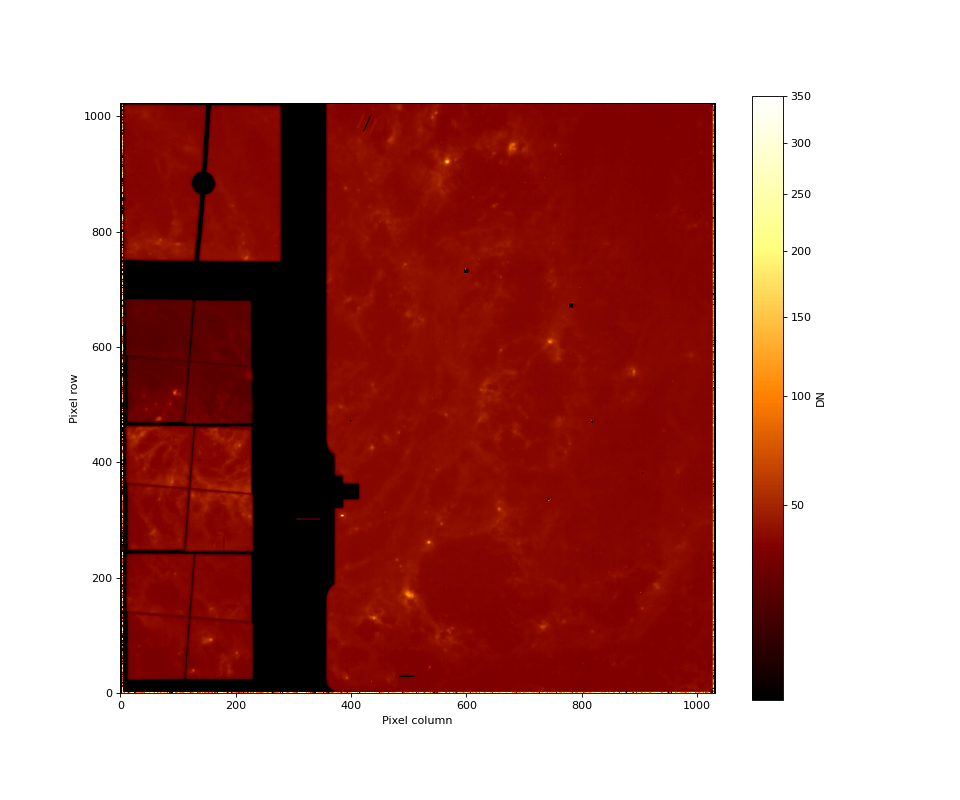

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

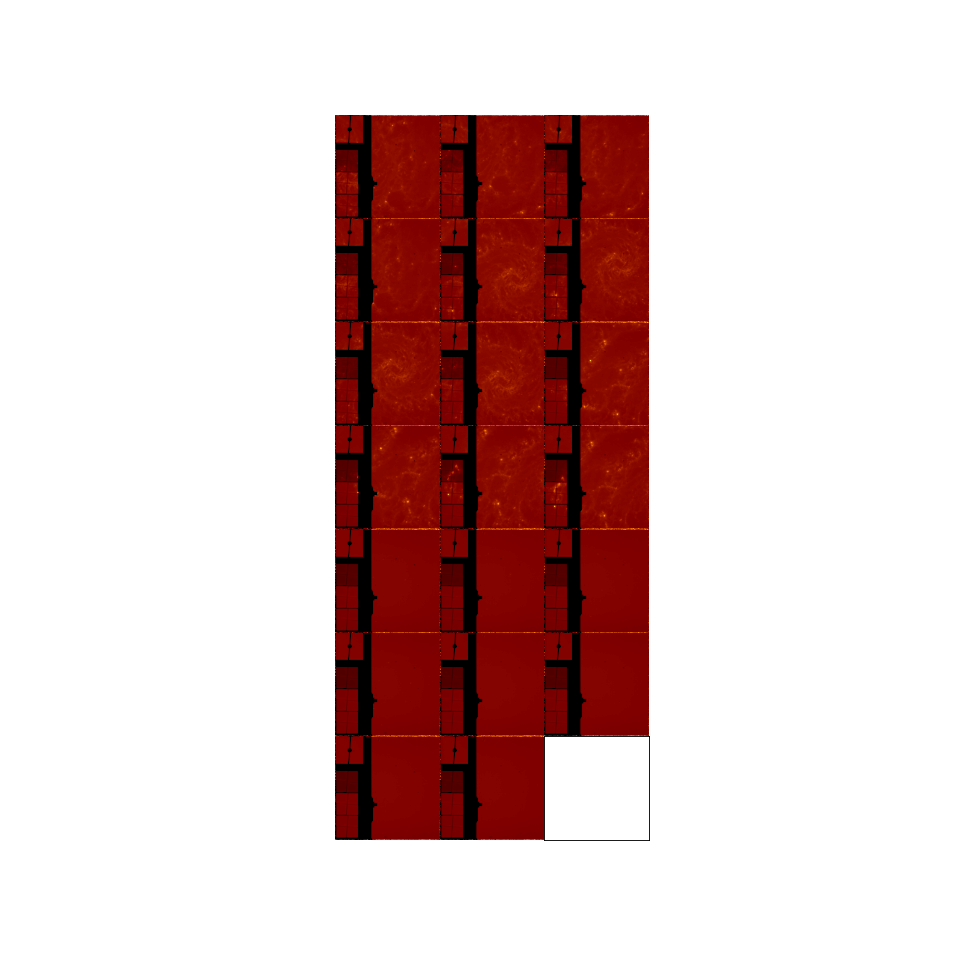

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1130W/stage1/jw02107039001_02105_00001_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039001_02105_00002_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039001_02105_00003_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039001_02105_00004_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039002_02105_00001_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039002_02105_00002_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039002_02105_00003_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039002_02105_00004_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039003_02105_00001_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039003_02105_00002_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039003_02105_00003_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107039003_02105_00004_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107040001_06201_00001_mirimage_fixed_rate.fits', './F1130W/stage1/jw02107040001_06201_00002_mirimage_fixed_rate.fits', './F1130W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-28 10:46:55,402 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-28 10:46:55,407 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-28 10:46:55,409 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-28 10:46:55,413 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-28 10:46:59,884 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-28 10:46:59,885 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-28 10:46:59,886 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-28 10:46:59,886 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-28 10:46:59,888 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-28 10:46:59,889 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-28 10:46:59,890 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-28 10:46:59,891 - stpipe.Image2Pipeline - 

2022-07-28 10:46:59,962 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-28 10:46:59,964 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-28 10:46:59,965 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-28 10:46:59,965 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-28 10:46:59,966 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-28 10:46:59,967 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-28 10:46:59,968 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02107039001_02105_00004_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupo

2022-07-28 10:47:00,033 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-28 10:47:00,034 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-28 10:47:00,035 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-28 10:47:00,036 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0784.fits'.
2022-07-28 10:47:00,038 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-28 10:47:00,038 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-28 10:47:00,039 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-28 10:47:00,040 - stpipe.Image2Pipeline - INFO - Prefetch for IF

2022-07-28 10:47:00,093 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-28 10:47:00,094 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-28 10:47:00,095 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02107039003_02105_00001_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-28 10:47:00,103 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-28 10:47:00,103 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-28 10:47:00,104 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.


2022-07-28 10:47:00,164 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0784.fits'.
2022-07-28 10:47:00,165 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-28 10:47:00,166 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-28 10:47:00,167 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-28 10:47:00,168 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-28 10:47:00,169 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-28 10:47:00,170 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-28 10:47:00,171 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-28 10:47:00,171 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-28 10:47:00,248 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-28 10:47:00,249 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-28 10:47:00,250 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-28 10:47:00,251 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-28 10:47:00,251 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-28 10:47:00,252 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-28 10:47:00,253 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-28 10:47:00,254 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-28 10:47:00,332 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-28 10:47:00,332 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-28 10:47:00,333 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-28 10:47:00,335 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-28 10:47:00,335 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-28 10:47:00,336 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-28 10:47:00,337 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-28 10:47:00,338 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-28 10:47:00,339 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw021070400

2022-07-28 10:47:00,410 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-28 10:47:00,411 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-28 10:47:00,412 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-28 10:47:00,412 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-28 10:47:00,413 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0784.fits'.
2022-07-28 10:47:00,414 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-28 10:47:00,415 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-28 10:47:02,153 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:47:02,155 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:47:02,156 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:47:02,171 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:47:02,400 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-28 10:47:02,654 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02107039001_02105_00001_mirimage_fixed_rate.fits>,).
2022-07-28 10:47:02,658 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-28 10:47:10,560 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:47:10,572 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:47:10,802 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-28 10:47:11,059 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02107039001_02105_00002_mirimage_fixed_rate.fits>,).
2022-07-28 10:47:11,063 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-28 10:47:11

2022-07-28 10:47:19,262 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-28 10:47:19,529 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02107039001_02105_00003_mirimage_fixed_rate.fits>,).
2022-07-28 10:47:19,532 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-28 10:47:19,596 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-28 10:47:19,596 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-28 10:47:

2022-07-28 10:47:28,162 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-28 10:47:28,163 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-28 10:47:28,315 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-28 10:47:28,316 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-28 10:47:28,316 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-28 10:47:28,317 - stpipe.Image2Pipeline.photom - INFO -  filter: F1130W
2022-07-28 10:47:28,414 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-28 10:47:28,418 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-28 10:47:28,419 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-28 10:47:28,420 - stpipe.Image2

2022-07-28 10:47:36,771 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-28 10:47:36,771 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-28 10:47:36,772 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-28 10:47:36,773 - stpipe.Image2Pipeline.photom - INFO -  filter: F1130W
2022-07-28 10:47:36,868 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-28 10:47:36,873 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-28 10:47:36,875 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-28 10:47:36,876 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 1.18843
2022-07-28 10:47:36,916 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-28 10:47:37,200 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02107039002_02105_00001_mirimage_fixed_rate.fits>,).
2022-07-28 10:4

2022-07-28 10:47:45,463 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-28 10:47:45,467 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-28 10:47:45,468 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-28 10:47:45,469 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 1.18843
2022-07-28 10:47:45,506 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-28 10:47:45,790 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02107039002_02105_00002_mirimage_fixed_rate.fits>,).
2022-07-28 10:47:45,794 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pi

2022-07-28 10:47:54,063 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-28 10:47:54,355 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02107039002_02105_00003_mirimage_fixed_rate.fits>,).
2022-07-28 10:47:54,361 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel_scale': None, 'single': False, 'blendheaders': False, 'allowed_memory': None}
2022-07-28 10:47:54,427 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jw

2022-07-28 10:48:02,936 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-28 10:48:02,976 - stpipe.Image2Pipeline.resample - INFO - Driz parameter kernel: square
2022-07-28 10:48:02,977 - stpipe.Image2Pipeline.resample - INFO - Driz parameter pixfrac: 1.0
2022-07-28 10:48:02,977 - stpipe.Image2Pipeline.resample - INFO - Driz parameter fillval: INDEF
2022-07-28 10:48:02,978 - stpipe.Image2Pipeline.resample - INFO - Driz parameter weight_type: ivm
2022-07-28 10:48:03,212 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-28 10:48:03,841 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:04,483 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-28 10:48:05,153 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:05,792 - stpipe.Image2Pipeline.resample - I

2022-07-28 10:48:11,636 - stpipe.Image2Pipeline.resample - INFO - Driz parameter fillval: INDEF
2022-07-28 10:48:11,637 - stpipe.Image2Pipeline.resample - INFO - Driz parameter weight_type: ivm
2022-07-28 10:48:11,877 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-28 10:48:12,530 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:13,184 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-28 10:48:13,843 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:14,499 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-28 10:48:15,173 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:15,834 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-28 10:48:16,489 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:17,163 - stp

2022-07-28 10:48:21,921 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-28 10:48:22,585 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:23,229 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-28 10:48:23,892 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:24,536 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-28 10:48:25,198 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:25,893 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  24.176574079 15.828225760 24.145909854 15.817479718 24.157189013 15.787688359 24.187849323 15.798432819
2022-07-28 10:48:26,136 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1130W/stage2/jw02107039003_02105_00002_mirimage_fixed_i2d.fits
2022-07-28 10:48:26,137 - stpipe.Image2Pipeline.resample - INFO - Ste

2022-07-28 10:48:33,368 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-28 10:48:34,019 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-28 10:48:34,699 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  24.177565856 15.823861802 24.146902238 15.813115903 24.158181003 15.783324491 24.188840707 15.794068808
2022-07-28 10:48:34,942 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1130W/stage2/jw02107039003_02105_00003_mirimage_fixed_i2d.fits
2022-07-28 10:48:34,943 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-28 10:48:34,944 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1130W/stage1/jw02107039003_02105_00003_mirimage_fixed
2022-07-28 10:48:34,947 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02107039003_02105_00004_mirimage_fixed
2022-07-28 10:48:34,948 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/jw021070

2022-07-28 10:48:43,878 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1130W/stage2/jw02107039003_02105_00004_mirimage_fixed_i2d.fits
2022-07-28 10:48:43,879 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-28 10:48:43,879 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1130W/stage1/jw02107039003_02105_00004_mirimage_fixed
2022-07-28 10:48:43,882 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02107040001_06201_00001_mirimage_fixed
2022-07-28 10:48:43,883 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/jw02107040001_06201_00001_mirimage_fixed_rate.fits ...
2022-07-28 10:48:44,297 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02107040001_06201_00001_mirimage_fixed_rate.fits>,).
2022-07-28 10:48:44,301 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'out

2022-07-28 10:48:52,691 - stpipe.Image2Pipeline - INFO - Processing product ./F1130W/stage1/jw02107040001_06201_00002_mirimage_fixed
2022-07-28 10:48:52,692 - stpipe.Image2Pipeline - INFO - Working on input ./F1130W/stage1/jw02107040001_06201_00002_mirimage_fixed_rate.fits ...
2022-07-28 10:48:53,096 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02107040001_06201_00002_mirimage_fixed_rate.fits>,).
2022-07-28 10:48:53,100 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-28 10:49:01,942 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2022-07-28 10:49:02,349 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa'

2022-07-28 10:49:11,171 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-28 10:49:11,324 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  24.196280066 15.685587713 24.165354549 15.675989533 24.175325921 15.646073430 24.206389528 15.655409692
2022-07-28 10:49:11,325 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  24.196280066 15.685587713 24.165354549 15.675989533 24.175325921 15.646073430 24.206389528 15.655409692
2022-07-28 10:49:11,325 - stpipe.Image2Pipeline

2022-07-28 10:49:20,191 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  24.184038559 15.714996675 24.153109205 15.705396630 24.163083962 15.675481130 24.194151435 15.684819261
2022-07-28 10:49:20,192 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  24.184038559 15.714996675 24.153109205 15.705396630 24.163083962 15.675481130 24.194151435 15.684819261
2022-07-28 10:49:20,193 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-28 10:49:20,338 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-28 10:49:20,662 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02107040002_06201_00001_mirimage_fixed_rate.fits>,).
2022-07-28 10:49:20,666 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_m

2022-07-28 10:49:29,053 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-28 10:49:29,200 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-28 10:49:29,520 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02107040002_06201_00002_mirimage_fixed_rate.fits>,).
2022-07-28 10:49:29,525 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False}
2022-07-28 10:49:29,743 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:49:29,744 - stpipe.

2022-07-28 10:49:38,402 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False}
2022-07-28 10:49:38,629 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:49:38,630 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:49:38,631 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:49:38,644 - stpipe.Image2Pipeline.flat_field - WARNING - K

2022-07-28 10:49:47,458 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:49:47,459 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:49:47,460 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:49:47,475 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-28 10:49:47,714 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-28 10:49:48,040 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02107040002_06201_00004_mirimage_fixed_rate.fits>,).
2022-07-28 10:49:48,046 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-28 10:49:57,568 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02107039003_02105_00001_mirimage_fixed_cal.fits
2022-07-28 10:49:57,898 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02107039003_02105_00002_mirimage_fixed_cal.fits
2022-07-28 10:49:58,223 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02107039003_02105_00003_mirimage_fixed_cal.fits
2022-07-28 10:49:58,556 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02107039003_02105_00004_mirimage_fixed_cal.fits
2022-07-28 10:49:58,889 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02107040001_06201_00001_mirimage_fixed_cal.fits
2022-07-28 10:49:59,225 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02107040001_06201_00002_mirimage_fixed_cal.fits
2022-07-28 10:49:59,555 - stpipe.Image2Pipeline - INFO - Saved model in ./F1130W/stage2/jw02107040001_06201_00003_mirimage_fixed_cal.fits
2022-07-28 10:49:59,883 - stpipe.I

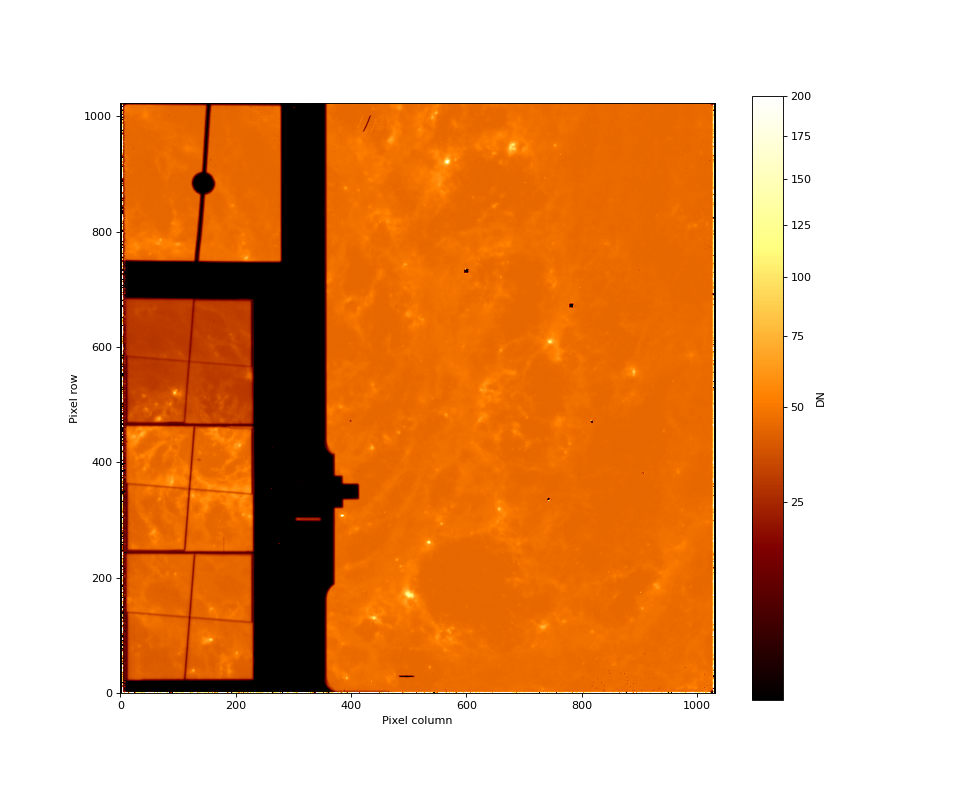

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

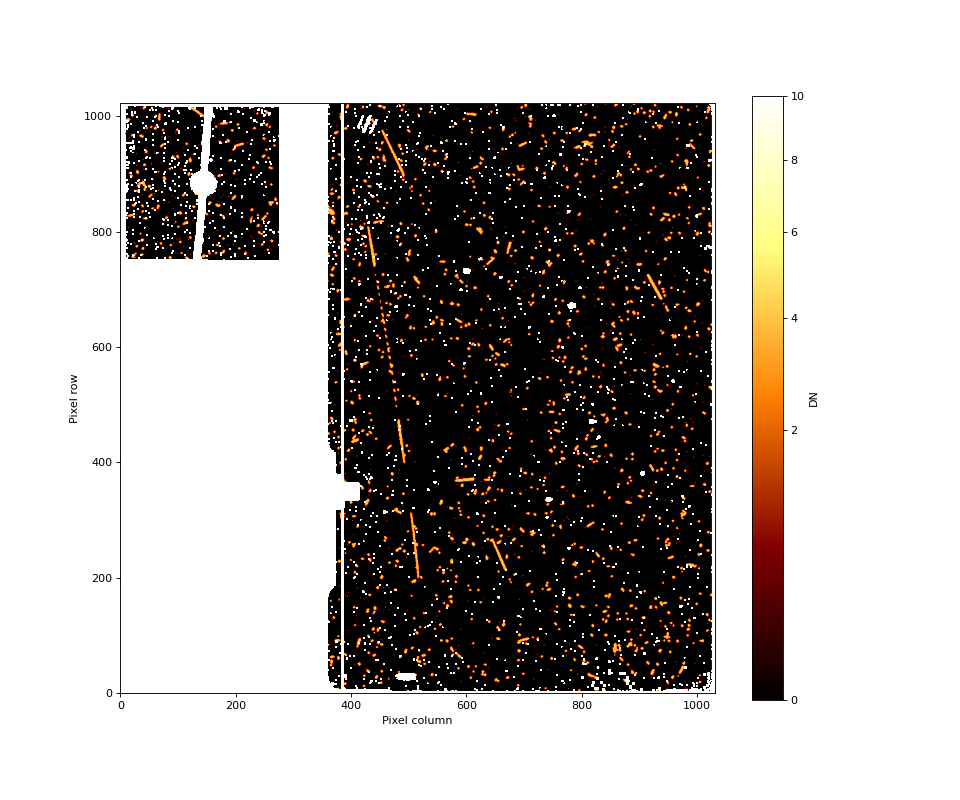

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

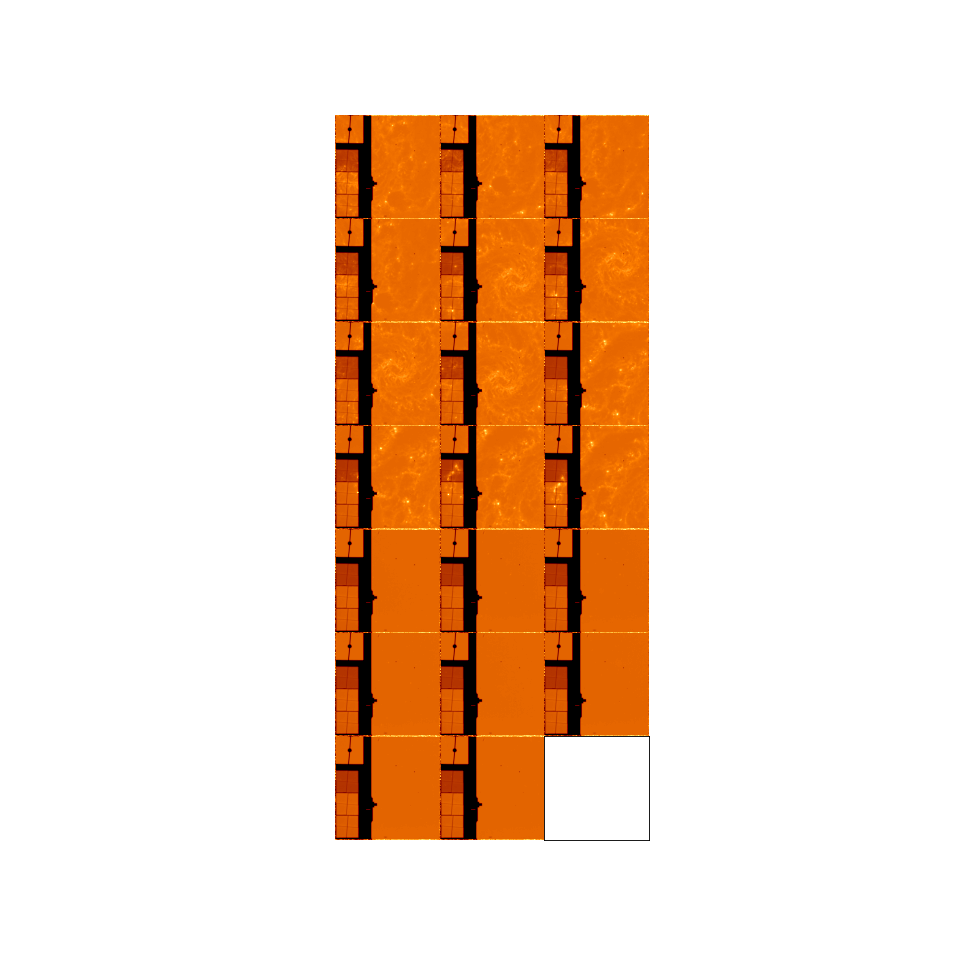

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}39001*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}39002*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)
    
# update the WCS for mosaic tile 3
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}39003*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile3_shifts)
    
# update the WCS for mosaic tile 4
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}40001*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile4_shifts)
    
# update the WCS for mosaic tile 5
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}40002*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile5_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1130W/stage2/jw02107039001_02105_00001_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039001_02105_00002_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039001_02105_00003_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039001_02105_00004_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039002_02105_00001_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039002_02105_00002_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039002_02105_00003_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039002_02105_00004_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039003_02105_00001_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039003_02105_00002_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039003_02105_00003_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107039003_02105_00004_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107040001_06201_00001_mirimage_fixed_wcs_cal.fits', './F1130W/stage2/jw02107040001_06201_00002_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-28 10:50:30,260 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-28 10:50:30,263 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-28 10:50:30,265 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-28 10:50:30,270 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-28 10:50:31,109 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-28 10:50:31,110 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-28 10:50:39,351 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-28 10:50:39,357 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 3.3, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-28 10:52:40,616 - stpipe.Image3Pipeline.outlier_detection - INFO - Blotting (1024, 1032) <-- (2092, 5648)
2022-07-28 10:52:40,675 - stpipe.Image3Pipeline.outlier_detection - INFO - Flagging outliers
2022-07-28 10:52:40,812 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1411 (0.13%)
2022-07-28 10:52:40,942 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1906 (0.18%)
2022-07-28 10:52:41,077 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1494 (0.14%)
2022-07-28 10:52:41,210 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1191 (0.11%)
2022-07-28 10:52:41,338 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1143 (0.11%)
2022-07-28 10:52:41,472 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 1115 (0.11%)
2022-07-28 10:52:41,603 - stpipe.Image3Pipeline.outlier_detection - INFO 

2022-07-28 10:53:10,461 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:11,943 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:13,415 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:14,905 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:16,387 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:17,875 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:19,328 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:20,805 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:22,277 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (2110, 5696)
2022-07-28 10:53:23,782 - stpipe.Image3Pipelin

2022-07-28 10:55:06,225 - stpipe.Image3Pipeline.resample - INFO - Saved model in ./F1130W/stage3/miri_F1130W_stage3_asn_i2d.fits
2022-07-28 10:55:06,226 - stpipe.Image3Pipeline.resample - INFO - Step resample done
2022-07-28 10:55:06,638 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog running with args (<ImageModel(2110, 5696) from miri_F1130W_stage3_asn_i2d.fits>,).
2022-07-28 10:55:06,642 - stpipe.Image3Pipeline.source_catalog - INFO - Step source_catalog parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'cat', 'search_output_file': True, 'input_dir': '', 'bkg_boxsize': 1000, 'kernel_fwhm': 2.0, 'snr_threshold': 5, 'npixels': 25, 'deblend': False, 'aperture_ee1': 30, 'aperture_ee2': 50, 'aperture_ee3': 70, 'ci1_star_threshold': 2.0, 'ci2_star_threshold': 1.8}
2022-07-28 10:55:06,695 - stpipe.Image3Pip

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

In [26]:
# Read in the source catalog
miri_source_cat = ascii.read(miri_catalog_file)

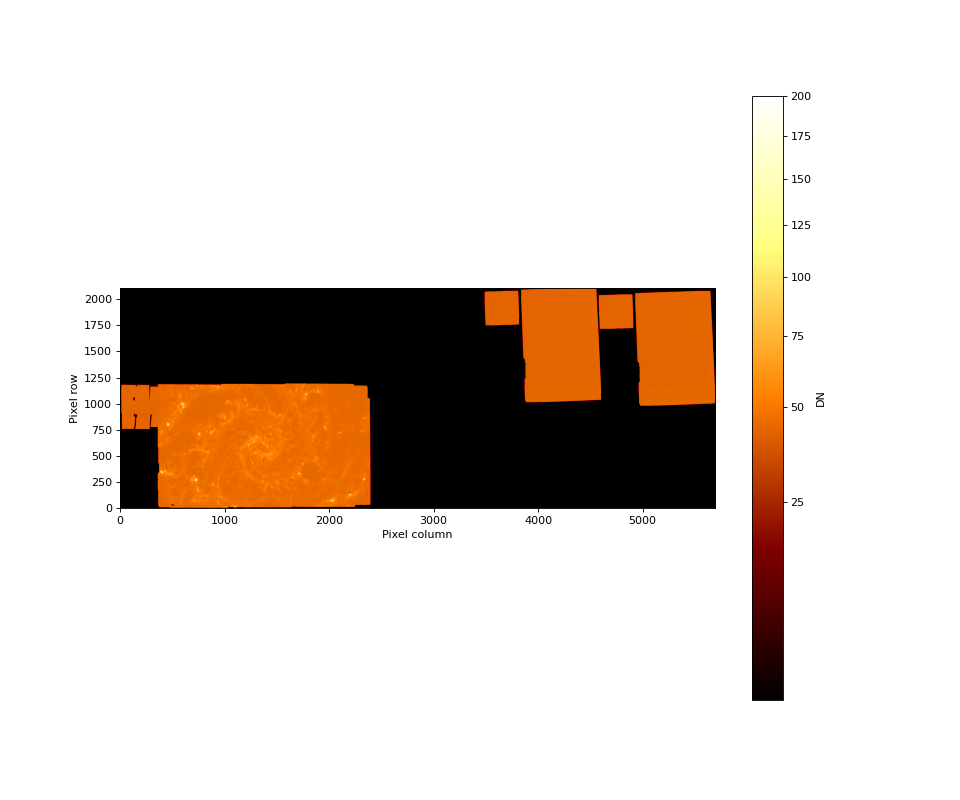

In [27]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

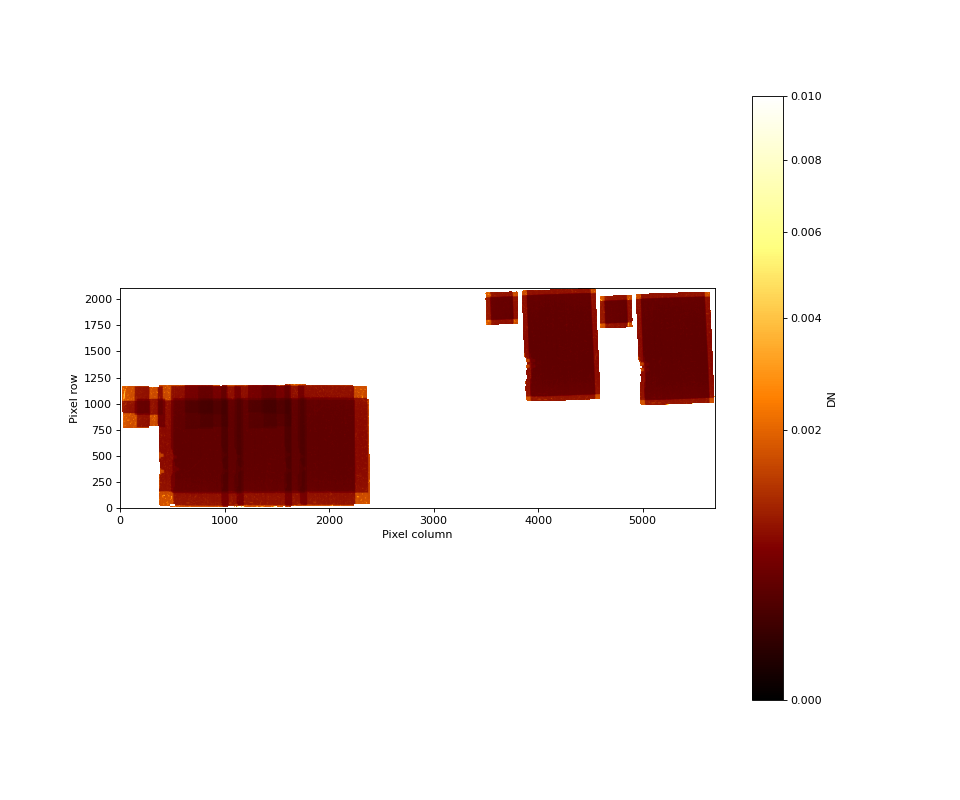

In [28]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

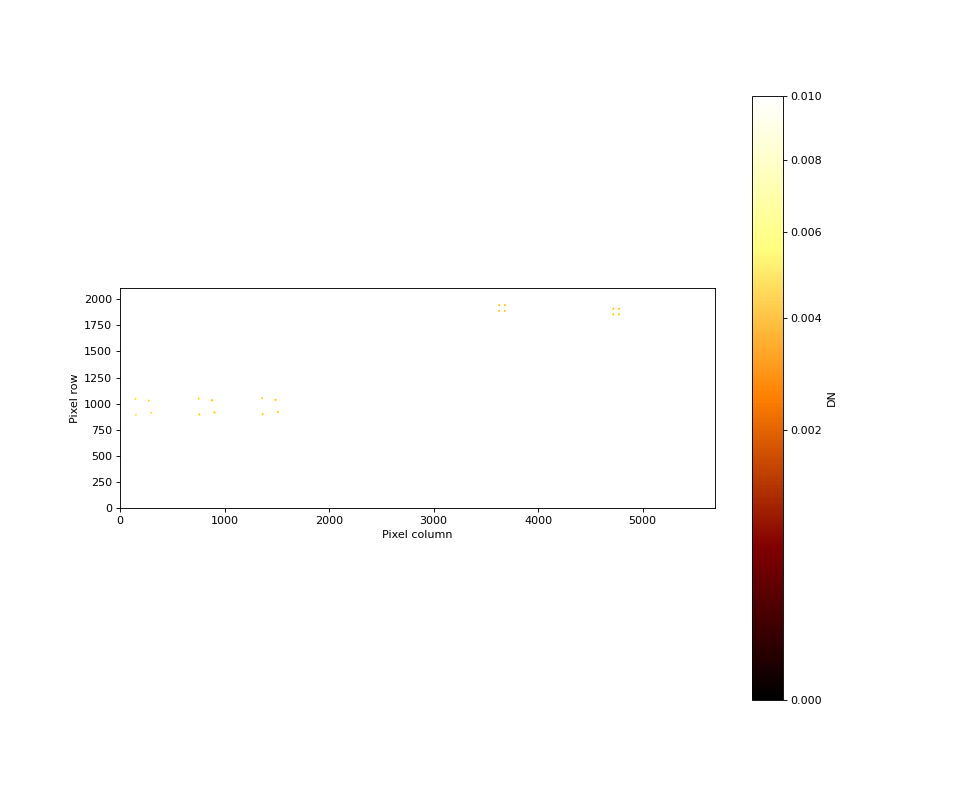

In [29]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

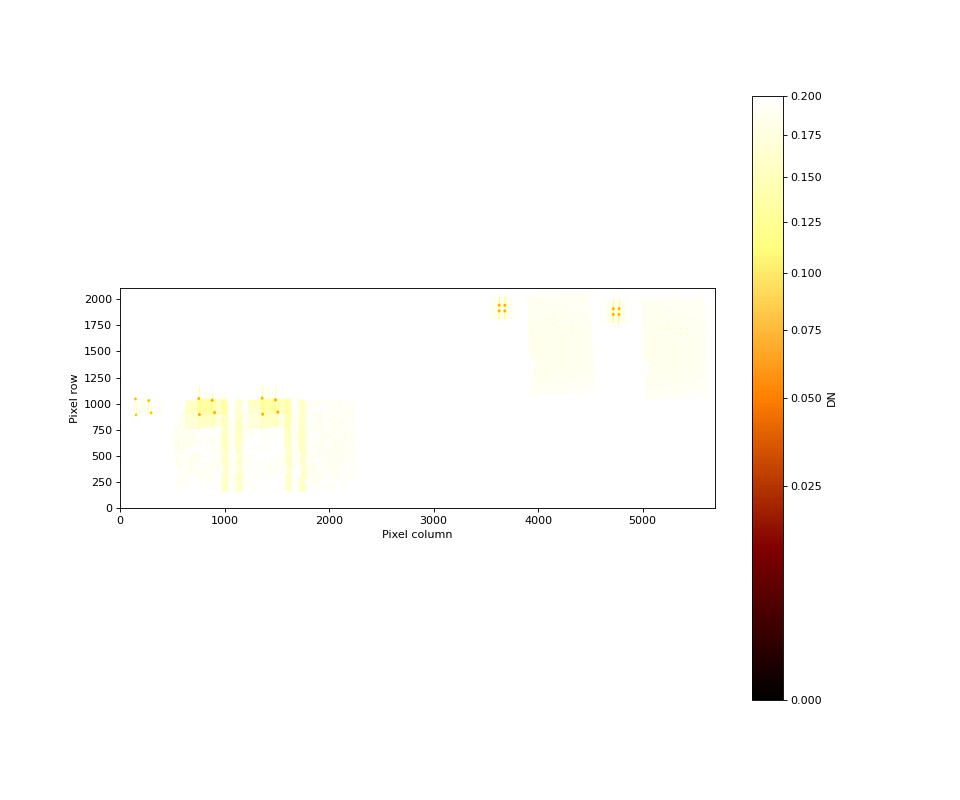

In [30]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

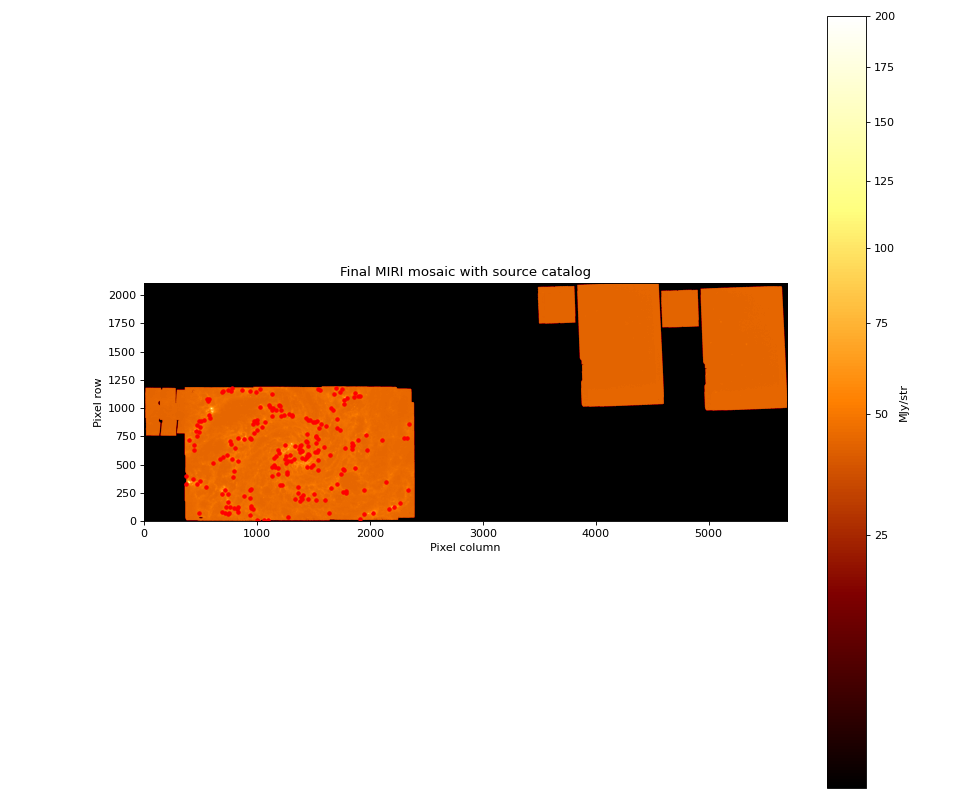

In [31]:
# Show the catalog sources on the mosaic
overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                title='Final MIRI mosaic with source catalog', dmap=dmap)